In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.patches as patches
from PIL import Image
import matplotlib.pyplot as plt
from utils import *
from kmeans_Anchors import *

In [79]:
IoU_fixed(1,1,10,10)

0.01

/home/marcelo/Documents/Yolov3/data/training/label_2/
path to the image /home/marcelo/Documents/Yolov3/data/training/image_2//003983.png


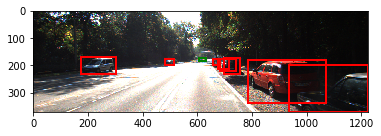

In [104]:
df = create_label_datframe(path_to_labels="/home/marcelo/Documents/Yolov3/data/training/label_2/")
display_bounding_boxes(df,path_to_images="/home/marcelo/Documents/Yolov3/data/training/image_2//",path_to_labels="/home/marcelo/Documents/Yolov3/data/training/label_2/")

In [ ]:
#img = cv2.imread(os.path.join(path_to_images,files[0].split(".")[0]+".png"),cv2.IMREAD_COLOR)
data = df.loc[np.random.randint(0,df.shape[0])]
file = data["image"]
print(file)
new_df  = df.loc[df["image"]==file]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51865 entries, 0 to 51864
Data columns (total 8 columns):
image     51865 non-null object
type      51865 non-null object
x_min     51865 non-null float64
y_min     51865 non-null float64
x_max     51865 non-null float64
y_max     51865 non-null float64
height    51865 non-null float64
width     51865 non-null float64
dtypes: float64(6), object(2)
memory usage: 3.2+ MB


In [41]:
data = np.column_stack((df["width"].astype(float),df["height"].astype(float),np.zeros((df.shape[0],1))))

In [107]:
data

array([[303.71, 167.91,   4.  ],
       [ 37.93,  69.88,   4.  ],
       [ 35.72,  30.35,   4.  ],
       ...,
       [ 13.55,   8.7 ,   4.  ],
       [ 18.41,  10.64,   4.  ],
       [ 22.79,  20.62,   4.  ]])

In [98]:
anchors

array([[349, 124],
       [ 45, 142],
       [412, 249],
       [371,  19],
       [598, 164]])

In [97]:
num_anchors = 5
width = np.random.randint(low=0,high=1200,size=num_anchors)
height = np.random.randint(low=0,high=400,size=num_anchors)
anchors = np.column_stack((width,height))

In [108]:
np.unique(data[:,2])


array([4.])

In [68]:

data[2][1]

30.349999999999994

In [106]:
iterations = 5
for i in range(0,iterations):
    for iterator in range(0,data.shape[0]):
        group = 0.0
        for anchor_iter in range(0,num_anchors):
            score = IoU_fixed(data[iterator][0],data[iterator][1],anchors[anchor_iter][0],anchors[anchor_iter][1])
            if score > group:
                group = anchor_iter
        data[iterator][2] = anchor_iter      
                
            